# 1. Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date, timedelta
import datetime
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 2. Download Dataset

In [71]:
dataset_1 = yf.download('RELIANCE.NS INFY.NS HDFCBANK.NS ICICIBANK.NS HDFC.NS TCS.NS KOTAKBANK.NS LT.NS HINDUNILVR.NS AXISBANK.NS ITC.NS BAJFINANCE.NS SBIN.NS BHARTIARTL.NS ASIANPAINT.NS HCLTECH.NS MARUTI.NS TITAN.NS TATASTEEL.NS BAJAJFINSV.NS', start='2016-01-01', end='2021-12-31', progress=False)

In [72]:
dataset_1 = dataset_1['Close']

# 3. Defining few Functions

**To calculate the Linear Regression Coefficients**

In [19]:
def regr(x,y):
    regr1 = LinearRegression()
    regr1.fit(x,y)
    return regr1.coef_

**To concatenate the Functions**

In [20]:
def for_concat(data):
    result = pd.concat(data, axis = 1)
    return result

**To return the SMA for 5 days**

In [21]:
def SMA(dataset,n=5):
    return dataset.rolling(5).mean().dropna()

# 4. Original Function to get the Slope of the Stocks and RSI Divergence

In [22]:
def Linear_Regression(dataset,n1,n2):

    regr1 = []
    regr2 = []
    
    new_dataset = dataset_1[-n1:]
    y_hat = new_dataset.copy()
    new_1_dataset = SMA(new_dataset)
    y_hat = y_hat.reset_index()
    new_1_dataset = new_1_dataset.reset_index()
    x = np.array(y_hat.index).reshape(-1, 1)
    x1 = np.array(new_1_dataset.index).reshape(-1,1)
    change = []
    change_up = []
    change_down = []
    avg_up= []      # empty list                                           
    avg_down = []
    rs = []
    rsi = []
    
    for i in new_1_dataset.columns[1:]:
        y = new_1_dataset[i]
        regr2.append(regr(x1,y))
    new1 = pd.DataFrame(regr2, index = new_1_dataset.columns[1:], columns = ['Slope of the Stocks'])
    
    for i in y_hat.columns[1:]:
        for j in y_hat[i]:
            change = y_hat[i].diff().dropna()    # first order differencing
            change_up = change.clip(lower=0) # for values less than 0 return 0
            change_down = (-1 * change.clip(upper=0)).abs()# for values greater than 0 return 0
            avg_up = change_up.rolling(n2).mean()
            avg_down = change_down.rolling(n2).mean().abs()
            rs = avg_up/avg_down   # calculating rs
            rsi = 100-(100/(1+rs))  # calculating RSI
        y = rsi.dropna()
        x = np.array(list(range(n2,n1))).reshape(-1,1)
        regr1.append(regr(x,y))
    new2 = pd.DataFrame(regr1, index = y_hat.columns[1:], columns = ['RSI'])
    frames = [new1, new2]
    return for_concat(frames)

In [62]:
def RSI_dataset_function(dataset,n2=14):
    for i in dataset:
        a = dataset[i]
        change = a.diff().dropna()
        change
        change_up = change.clip(lower=0)
        change_down = (-1 * change.clip(upper=0)).abs()
        change_up,change_down
        avg_up = change_up.rolling(n2).mean()
        avg_down = change_down.rolling(n2).mean().abs()
        rs = avg_up/avg_down   # calculating rs
        rsi = 100-(100/(1+rs))  # calculating RSI
        dataset[i] = rsi
    return dataset.dropna()

In [64]:
RSI_dataset_function(dataset_1,14)

,ASIANPAINT.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,TATASTEEL.NS,TCS.NS,TITAN.NS
Date,,,,,,,,,,,,,,,,,,,,
2016-02-11,64.340878,51.097525,51.093161,63.407892,73.356028,49.404869,62.088828,55.564650,74.036111,57.648353,36.342571,60.231975,68.332070,73.534542,66.079941,41.898162,71.259859,53.273906,58.192681,59.771712
2016-02-12,48.895511,43.086606,40.958841,56.908750,80.637791,46.490699,50.474631,47.699858,77.135622,38.787685,31.631268,56.699215,45.125289,52.069901,35.381381,31.191420,50.249664,40.366343,51.447961,55.176840
2016-02-15,51.214921,52.886112,35.230350,57.074428,75.386840,49.856528,41.459326,39.239836,69.225073,44.313036,31.431848,57.811749,48.567984,66.044934,49.629899,42.745727,61.354425,53.385304,51.567276,46.834560
2016-02-16,53.328853,51.393474,37.299145,54.132199,71.727941,50.177541,42.227867,42.440652,72.795253,36.608121,28.728361,41.875337,49.511239,61.373503,45.053654,44.582346,54.519593,49.777299,52.167477,48.047908
2016-02-17,53.948778,50.316432,38.666757,59.444134,76.779268,40.977882,43.495288,41.939973,62.249508,36.605229,31.270849,26.569681,52.853674,64.385377,42.477997,41.043211,52.796403,47.463311,50.125058,48.970843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,84.368972,68.519267,50.112066,58.451190,52.053184,77.509975,47.667649,49.378515,62.961385,78.047034,78.669903,65.615278,52.379655,73.330563,65.990712,59.153837,59.900748,68.163545,63.850322,62.960258
2021-12-27,83.093771,55.073314,47.406426,54.146305,49.524335,74.686685,37.689422,40.553301,57.919800,61.780924,76.924525,59.342461,40.638820,71.825515,70.405317,54.919592,49.341636,55.046295,59.138553,55.096237
2021-12-28,83.391314,46.905965,38.207382,46.108820,37.281283,71.011035,28.116707,26.016945,51.653937,44.219562,72.224444,57.319163,41.445114,69.833061,57.034920,50.541892,40.056562,46.720495,50.603725,53.822687


# 5. A function to get the RSI Divergence of the data. Lately we are gonna use this in our Linear Regression Function

In [23]:
def Function_2(dataset,n1,n2):
    regr1 = []
    #regr2 = []
    new_dataset = dataset_1[-n1:]
    y_hat = new_dataset.copy()
    #new_1_dataset = SMA(new_dataset)
    y_hat = y_hat.reset_index()
    #new_1_dataset = new_1_dataset.reset_index()
    x = np.array(y_hat.index).reshape(-1, 1)
    #x1 = np.array(new_1_dataset.index).reshape(-1,1)
    change = []
    change_up = []
    change_down = []
    avg_up= []      # empty list                                           
    avg_down = []
    rs = []
    rsi = []
    for i in y_hat.columns[1:]:
        for j in y_hat[i]:
            change = y_hat[i].diff().dropna()    # first order differencing
            change_up = change.clip(lower=0) # for values less than 0 return 0
            change_down = (-1 * change.clip(upper=0)).abs()# for values greater than 0 return 0
            avg_up = change_up.rolling(n2).mean()
            avg_down = change_down.rolling(n2).mean().abs()
            rs = avg_up/avg_down   # calculating rs
            rsi = 100-(100/(1+rs))  # calculating RS
        y = rsi.dropna()
        x = np.array(list(range(n2,n1))).reshape(-1,1)
        regr1.append(regr(x,y))
    return pd.DataFrame(regr1, index = y_hat.columns[1:], columns = ['RSI'])

# 6. A function to get the Slope of the Stocks and RSI Divergence. We are going to use Function_1 in this directly.

In [24]:
def Function_1(dataset,n1):
    regr2 = []
    new_dataset = dataset_1[-n1:]
    #y_hat = new_dataset.copy()
    new_1_dataset = SMA(new_dataset)
    #y_hat = y_hat.reset_index()
    new_1_dataset = new_1_dataset.reset_index()
    #x = np.array(y_hat.index).reshape(-1, 1)
    x1 = np.array(new_1_dataset.index).reshape(-1,1)
    for i in new_1_dataset.columns[1:]:
        y = new_1_dataset[i]
        regr2.append(regr(x1,y))
    new1 = pd.DataFrame(regr2, index = new_1_dataset.columns[1:], columns = ['Slope of the Stocks'])
    new2 = Function_2(dataset,n1,19)
    frames = [new1, new2]
    return for_concat(frames)

In [25]:
Function_1(dataset_1,30)

,Slope of the Stocks,RSI
ASIANPAINT.NS,7.971411,1.588782
AXISBANK.NS,0.239179,0.096336
BAJAJFINSV.NS,-62.483045,-0.421599
BAJFINANCE.NS,-11.844522,0.473870
BHARTIARTL.NS,-3.503169,0.512873
HCLTECH.NS,5.226912,1.483870
HDFC.NS,-12.401714,0.300983
HDFCBANK.NS,-3.196325,-0.037080
HINDUNILVR.NS,-3.392911,1.285640
ICICIBANK.NS,-0.155091,1.717031


In [26]:
Linear_Regression(dataset_1,30,19)

,Slope of the Stocks,RSI
ASIANPAINT.NS,7.971411,1.588782
AXISBANK.NS,0.239179,0.096336
BAJAJFINSV.NS,-62.483045,-0.421599
BAJFINANCE.NS,-11.844522,0.473870
BHARTIARTL.NS,-3.503169,0.512873
HCLTECH.NS,5.226912,1.483870
HDFC.NS,-12.401714,0.300983
HDFCBANK.NS,-3.196325,-0.037080
HINDUNILVR.NS,-3.392911,1.285640
ICICIBANK.NS,-0.155091,1.717031


# After comparing the results, we get that the Outputs from both the functions is same.

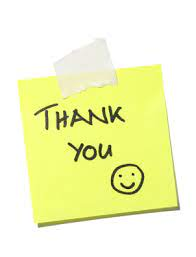

In [75]:
def SMA_dataset_function(dataset,n=5):
    return dataset.rolling(5).mean().dropna()
SMA_dataset = SMA_dataset_function(dataset_1)
# SMA_dataset

In [94]:
def RSI_dataset_function(dataset,n2=14):
    for i in dataset:
        a = dataset[i]
        change = a.diff().dropna()
        change
        change_up = change.clip(lower=0)
        change_down = (-1 * change.clip(upper=0)).abs()
        change_up,change_down
        avg_up = change_up.rolling(n2).mean()
        avg_down = change_down.rolling(n2).mean().abs()
        rs = avg_up/avg_down   # calculating rs
        rsi = 100-(100/(1+rs))  # calculating RSI
        dataset[i] = rsi
    return dataset.dropna()
RSI_dataset = RSI_dataset_function(dataset_1)
RSI_dataset

,ASIANPAINT.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,TATASTEEL.NS,TCS.NS,TITAN.NS
Date,,,,,,,,,,,,,,,,,,,,
2016-03-02,43.015726,60.687765,54.333218,41.610290,39.074877,59.146617,51.231018,54.769785,40.876740,56.139663,75.320308,51.404309,47.048409,37.972264,48.536129,69.779259,49.116389,60.381091,54.045902,38.299950
2016-03-03,55.670933,65.916004,58.377690,46.889696,23.204655,63.191036,58.142370,60.538501,37.913000,72.611203,79.761950,52.841385,62.349480,63.081896,81.271829,84.169584,68.428087,76.913980,58.675022,43.507332
2016-03-04,52.613316,48.663525,60.208588,45.231066,29.621191,51.637925,65.428269,66.671448,43.649089,66.246560,78.183859,50.083647,60.969449,40.495574,57.895453,67.973003,55.650570,64.396637,54.282859,47.421420
2016-03-08,53.724472,51.996503,59.804758,50.184967,37.693875,49.979152,65.674022,63.819891,38.868548,73.764003,82.030112,63.530276,58.104532,49.049769,60.919999,69.301504,66.222792,68.935900,54.988283,50.403392
2016-03-09,50.298031,53.052668,59.460650,46.136555,30.099747,54.282459,61.401392,64.187501,44.450944,74.310402,77.799325,73.760976,55.943561,44.943738,62.706951,71.094107,66.061364,69.052179,55.707228,54.455697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,82.077145,56.054538,55.948378,58.131943,63.455582,67.736658,61.346891,45.693634,63.451426,70.122841,74.788359,70.743592,59.830454,87.752239,65.206962,58.078632,63.424192,76.546167,61.596259,68.105669
2021-12-27,80.374836,41.624694,52.370969,52.027276,59.341005,64.207867,50.674696,37.687259,57.876771,50.498538,73.260425,62.010761,43.931025,85.693000,79.666867,48.140836,49.744220,49.932293,57.717411,59.497912
2021-12-28,80.161094,36.600102,47.315006,52.997879,44.754316,58.672951,42.107425,28.460006,53.404605,35.527979,67.249660,61.444716,43.605942,82.519978,70.613237,42.755866,41.648054,40.124127,48.581072,56.167326


In [92]:
def LR_slope_function(dataset,n1):
    new_dataset = dataset[-n1:]
    y_hat = new_dataset.copy()
    
    x = np.array(y_hat.index).reshape(-1, 1)
    x1 = np.array(new_dataset.index).reshape(-1,1)

    for i in new_dataset.columns[1:]:
        y = new_dataset[i]
        regr2.append(regr(x1,y))
    
    new1 = pd.DataFrame(regr2, index = new_dataset.columns[1:], columns = ['Slope of the Stocks'])
    return new1
    

In [93]:
LR_slope_function(SMA_dataset,30)

,Slope of the Stocks
AXISBANK.NS,1.489993e-14
BAJAJFINSV.NS,-4.011896e-15
BAJFINANCE.NS,1.911138e-15
BHARTIARTL.NS,-1.222499e-14
HCLTECH.NS,1.240815e-14
HDFC.NS,-7.032544e-15
HDFCBANK.NS,3.542827e-15
HINDUNILVR.NS,-3.707109e-17
ICICIBANK.NS,1.158003e-14
INFY.NS,3.997965e-15
